In [ ]:
!pip3 install networkx==2.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.9 MB/s 
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556009 sha256=33d909eb4ad4bc3f214823474180586844c1c0d65fe63316adfb9605141f6633
  Stored in directory: /root/.cache/pip/wheels/44/e6/b8/4efaab31158e9e9ca9ed80b11f6b11130bac9a9672b3cbbeaf
Successfully built networkx
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6.3
    Uninstalling networkx-2.6.3:
      Successfully uninstalled networkx-2.6.3


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_nodes = pd.read_csv('Dining-table_partners [Nodes].csv')
df_edges = pd.read_csv('Dining-table_partners [Edges].csv')

In [ ]:
# from networkx.classes.function import nodes
# from networkx.algorithms.assortativity.pairs import node_attribute_xy
# # G = nx.Graph(directed=True)
# merge = df_edges.merge(df_nodes, on='Id', how='inner')
# merge = merge[merge.columns.drop(merge.filter(regex='_x'))]
# # print(merge.sort_values(['Id']))

# for index, row in merge.iterrows():
#     G.add_node(row['Label_y'])

# for index, row in merge.iterrows():
#     G.add_weighted_edges_from([(row['Source'], row['Target'], row['Weight'])])
# # pos = nx.spring_layout(G, k = 0.5)
# plt.figure(figsize=(30,30))
# options = {
#     'edge_color': 'g',
#     'node_size' :1200,
#     'node_color': 'r',
#     'width': 2,
#     'with_labels': True,
#     'font_weight': 'regular',
# }
# # nx.draw_networkx_edge_labels(G,pos=pos)

# """
# - k controls the distance between the nodes and varies between 0 and 1
# - iterations is the number of times simulated annealing is run
# default k=0.1 and iterations=50
# """
# nx.draw_networkx(G,  pos=nx.spring_layout(G, k=0.5, iterations=50), **options)
# ax = plt.gca()

# plt.show()

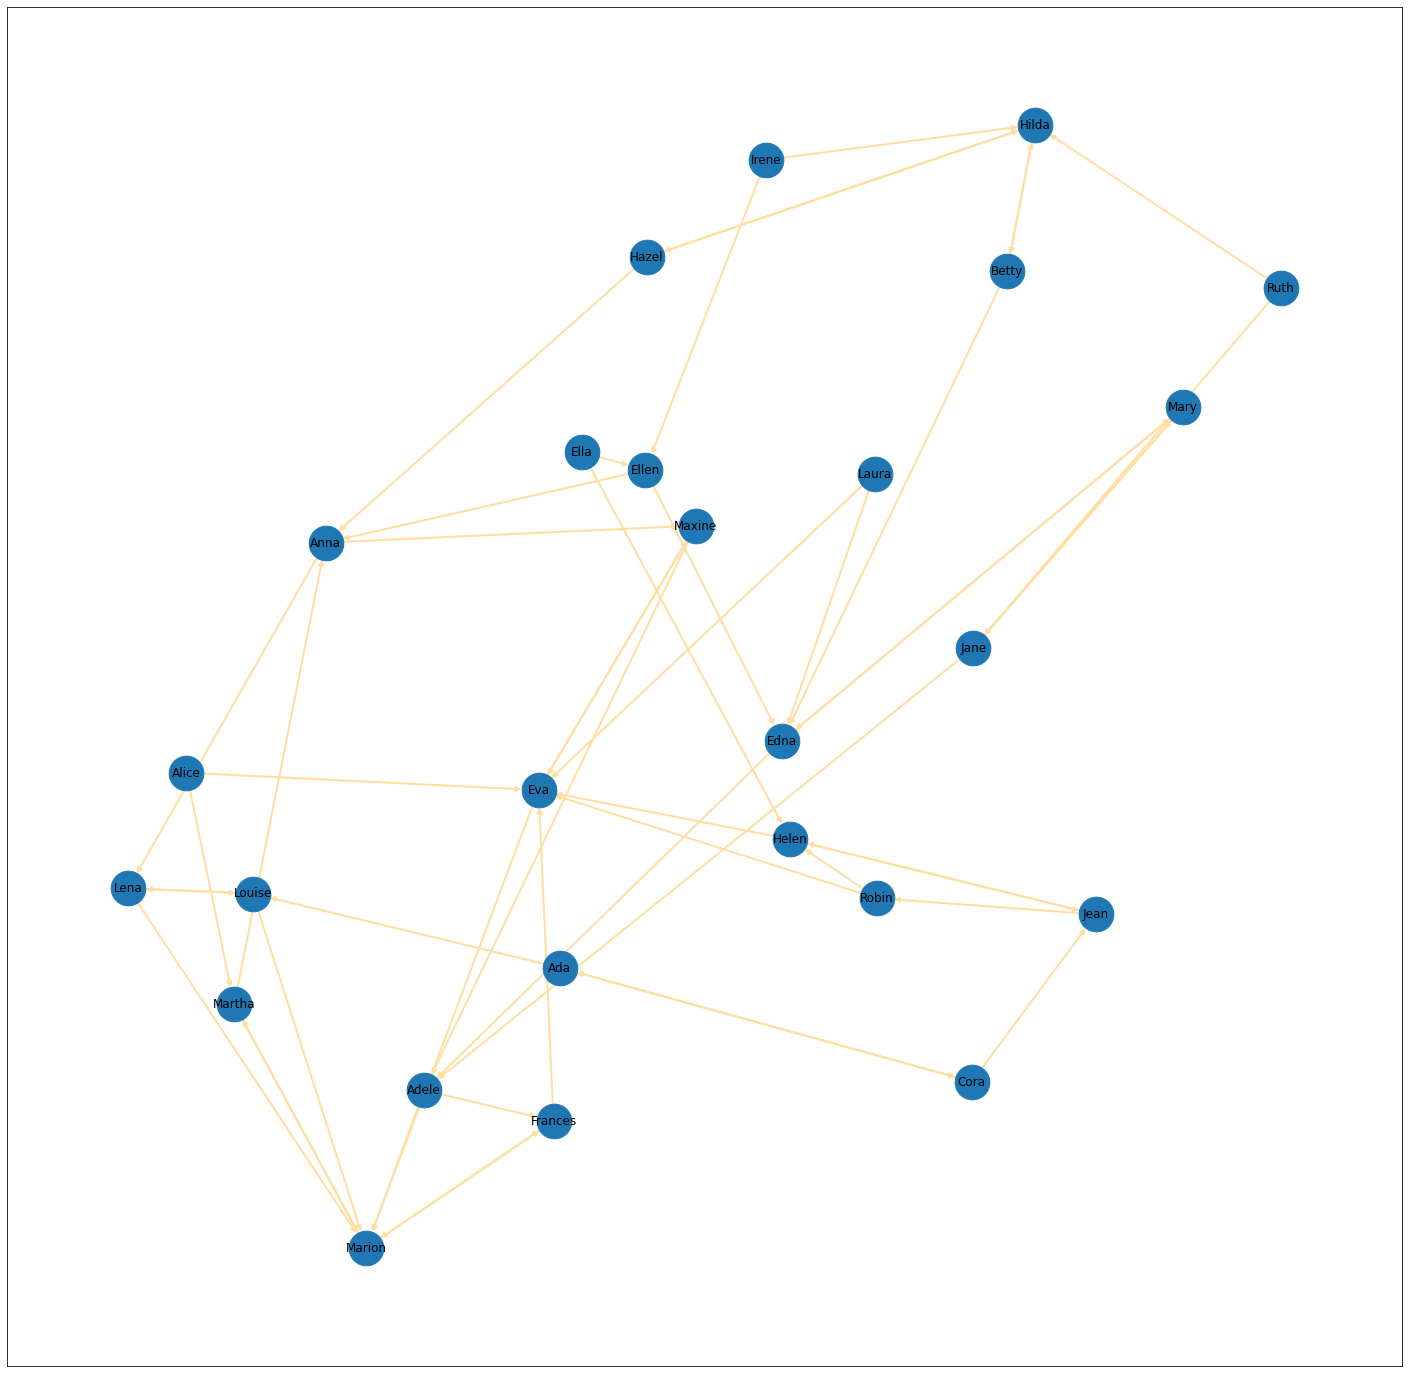

In [38]:
merge = df_edges.merge(df_nodes, on='Id', how='inner')
merge = merge[merge.columns.drop(merge.filter(regex='_x'))]

# print(merge.sort_values(['Id']))

G = nx.DiGraph(edge_attr='Weight')

for index, row in df_nodes.iterrows():
    G.add_node(row['Label'])

for index, row in df_edges.iterrows():
    G.add_weighted_edges_from([(row['Source'], row['Target'], row['Weight'])])

color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
             7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa', 
             13:'#d6dcff', 14:'#d2f5f0'} 

relabel = {1: "Ada", 2: "Cora", 3: "Louise", 4: "Jean", 5: "Helen", 6: "Martha",
             7: "Alice", 8: "Robin", 9: "Marion", 10: "Maxine", 11: "Lena", 12: "Hazel",
             13: "Hilda", 14: "Frances", 15: "Eva", 16: "Ruth", 17: "Edna", 18: "Adele",
             19: "Jane", 20: "Anna", 21: "Mary", 22: "Betty", 23: "Ella", 24: "Ellen",
             25: "Laura", 26: "Irene"}

G = nx.relabel_nodes(G, relabel)
plt.figure(figsize=(25,25))
options = {
    'edge_color': '#FFDEA2',
    'node_size' : 1200,
    'width': 2,
    'with_labels': True,
    'font_weight': 'regular',
}

"""
Using the spring layout : 
- k controls the distance between the nodes and varies between 0 and 1
- iterations is the number of times simulated annealing is run
default k=0.1 and iterations=50
"""
nx.draw_networkx(G,  pos=nx.spring_layout(G, k=0.1, iterations=15), **options)
ax = plt.gca()
plt.show()

In [35]:
neighbours = {n: len(list(nx.all_neighbors(G, n))) for n in G.nodes}

In [36]:
print(neighbours)
print(max(neighbours, key=neighbours.get))

{'Ada': 3, 'Cora': 3, 'Louise': 4, 'Jean': 4, 'Helen': 5, 'Martha': 4, 'Alice': 2, 'Robin': 3, 'Marion': 8, 'Maxine': 4, 'Lena': 4, 'Hazel': 3, 'Hilda': 6, 'Frances': 4, 'Eva': 8, 'Ruth': 2, 'Edna': 6, 'Adele': 5, 'Jane': 4, 'Anna': 5, 'Mary': 4, 'Betty': 3, 'Ella': 2, 'Ellen': 4, 'Laura': 2, 'Irene': 2}
Marion
